<a href="https://colab.research.google.com/github/teonakuzmanovska/Data-Science/blob/master/labs/lab2/lab2_191523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [8]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## The Water Potability Dataset

## Downloading the Water Potability Dataset

In [5]:
!gdown 1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW
To: /content/water-potability.csv
100% 525k/525k [00:00<00:00, 92.7MB/s]


## Exploring the Water Potability Dataset
The Water Potability dataset contains water quality metrics for 3276 different water bodies. The dataset includes ten attributes, each providing valuable information about water characteristics. These attributes encompass pH value, hardness, total dissolved solids (TDS), chloramines, sulfate concentration, conductivity, organic carbon, trihalomethanes, turbidity, and the target variable, potability. pH value is crucial for assessing the acid–base balance, while hardness indicates the presence of calcium and magnesium salts. TDS measures the mineral content, chloramines are disinfectants, sulfate is a natural substance found in minerals, conductivity indicates water's ability to conduct electric current, organic carbon measures carbon in organic compounds, and trihalomethanes are chemicals found in chlorine-treated water. Turbidity assesses the quantity of solid matter in suspended state. The target variable, 'Potability,' is binary (1 for potable and 0 for not potable), indicating whether water is safe for human consumption.

Load the dataset into a `pandas` data frame.

In [9]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('/content/water-potability.csv')

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.
import missingno as msno

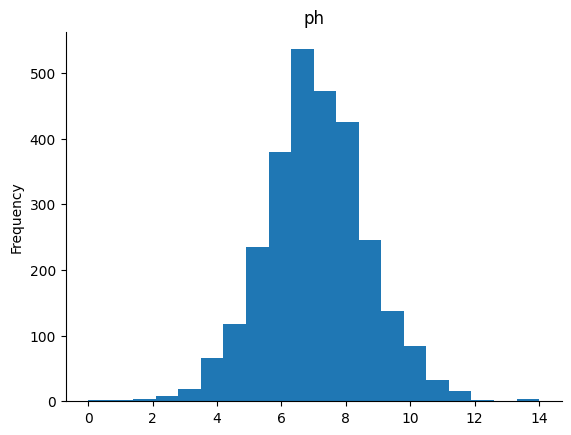

In [ ]:
from matplotlib import pyplot as plt
df['ph'].plot(kind='hist', bins=20, title='ph')
plt.gca().spines[['top', 'right',]].set_visible(False)

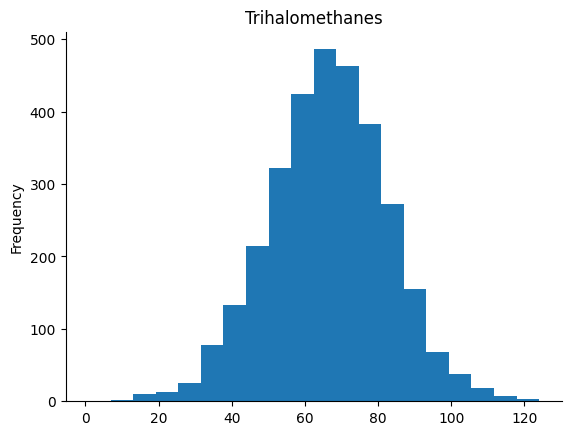

In [ ]:
from matplotlib import pyplot as plt
df['Trihalomethanes'].plot(kind='hist', bins=20, title='Trihalomethanes')
plt.gca().spines[['top', 'right',]].set_visible(False)

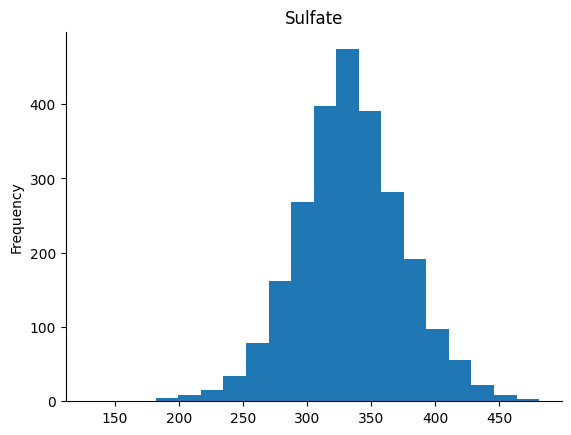

In [ ]:
from matplotlib import pyplot as plt
df['Sulfate'].plot(kind='hist', bins=20, title='Sulfate')
plt.gca().spines[['top', 'right',]].set_visible(False)

Check if the dataset is balanced.

In [ ]:
from matplotlib import pyplot as plt
df['Sulfate'].plot(kind='hist', bins=20, title='Sulfate')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
potability = df.Potability.value_counts()
sum = 0
for pot in potability:
  sum = sum + pot

for pot in potability:
  print(pot/sum * 100)

60.98901098901099
39.010989010989015


In [17]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [19]:
imbalance_ratio = df.Potability.value_counts().max() / df.Potability.value_counts().min()
print('Imbalance Ratio:', imbalance_ratio)

Imbalance Ratio: 1.5633802816901408


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
# Write your code here. Add as many boxes as you need.
import numpy as np

In [ ]:
df_missing_values = df.isna().sum().reset_index()
df_missing_values.columns = ["Column name", "Missing values"]
df_missing_values["Missing values %"] = df_missing_values["Missing values"] / len(df.iloc[:, 0]) * 100
df_missing_values

,Column name,Missing values,Missing values %
0,ph,491,14.987790
1,Hardness,0,0.000000
2,Solids,0,0.000000
3,Chloramines,0,0.000000
4,Sulfate,781,23.840049
5,Conductivity,0,0.000000
6,Organic_carbon,0,0.000000
7,Trihalomethanes,162,4.945055
8,Turbidity,0,0.000000
9,Potability,0,0.000000


In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

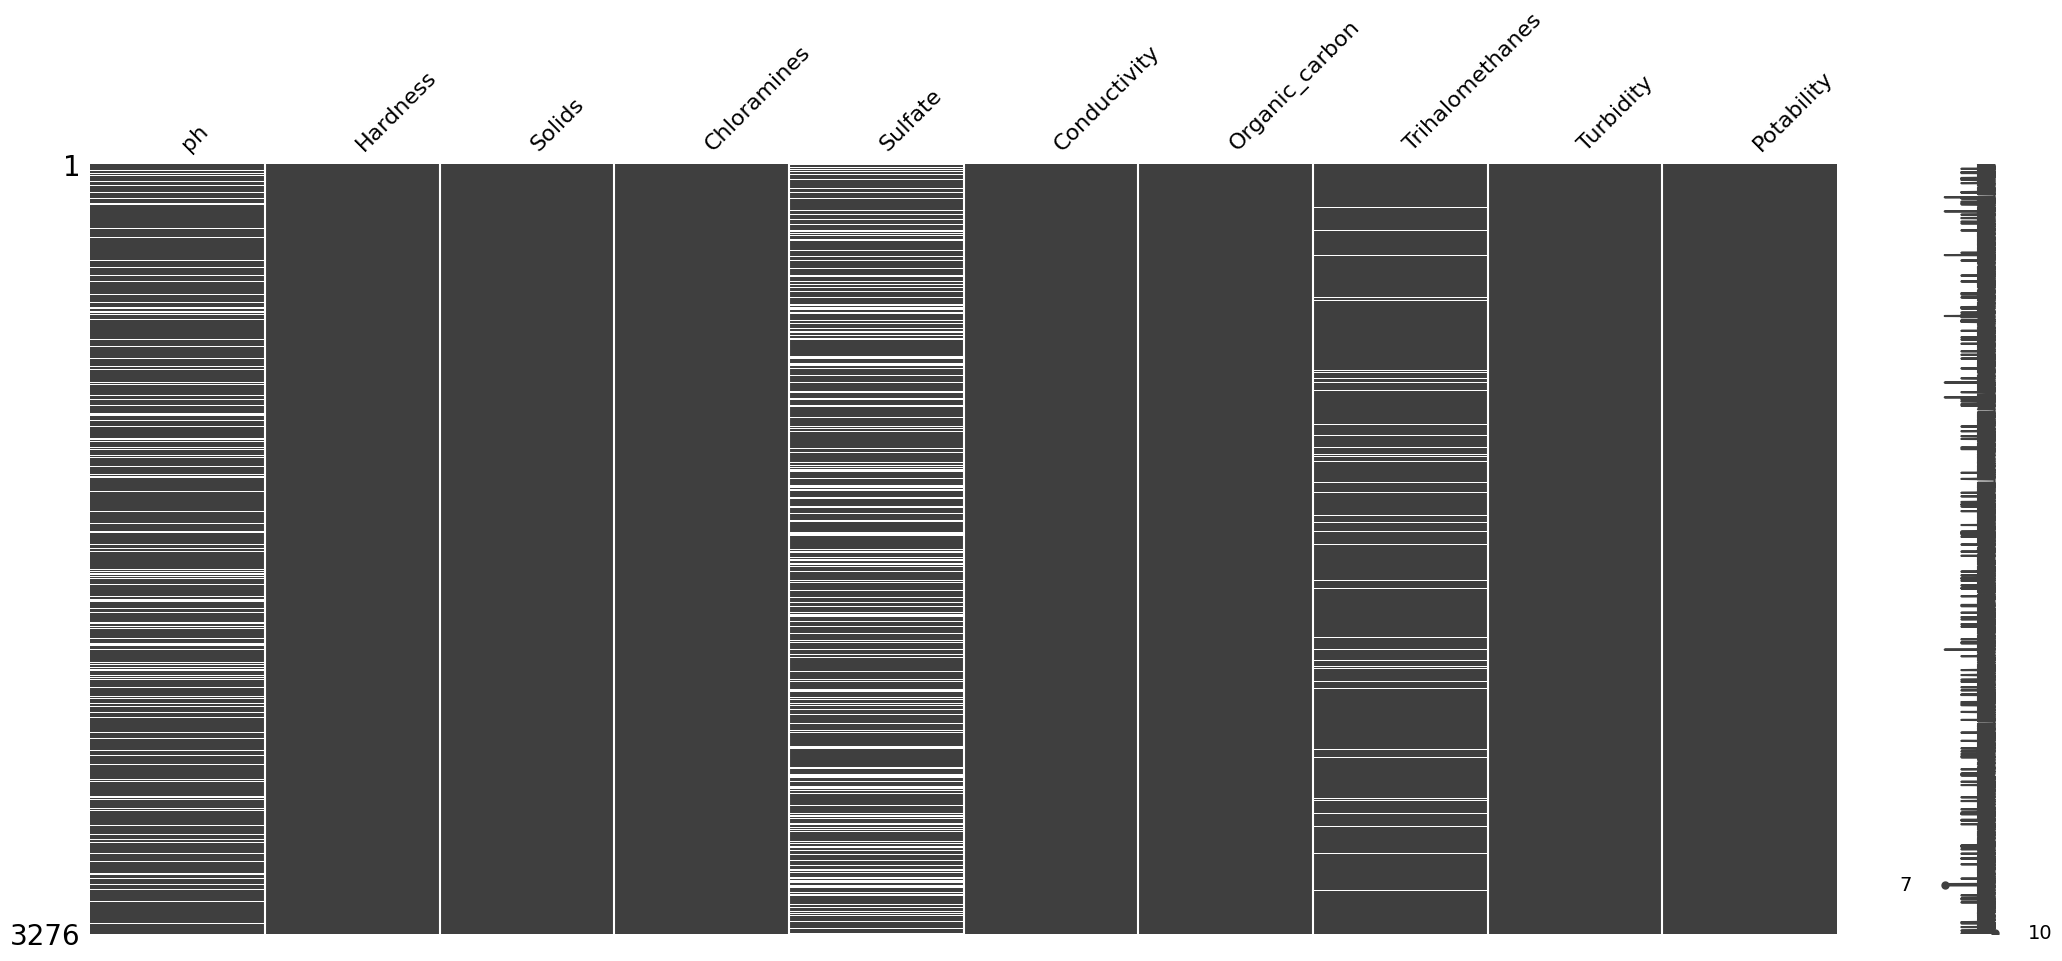

In [ ]:
# Write your code here. Add as many boxes as you need.
msno.matrix(df)

<Axes: >

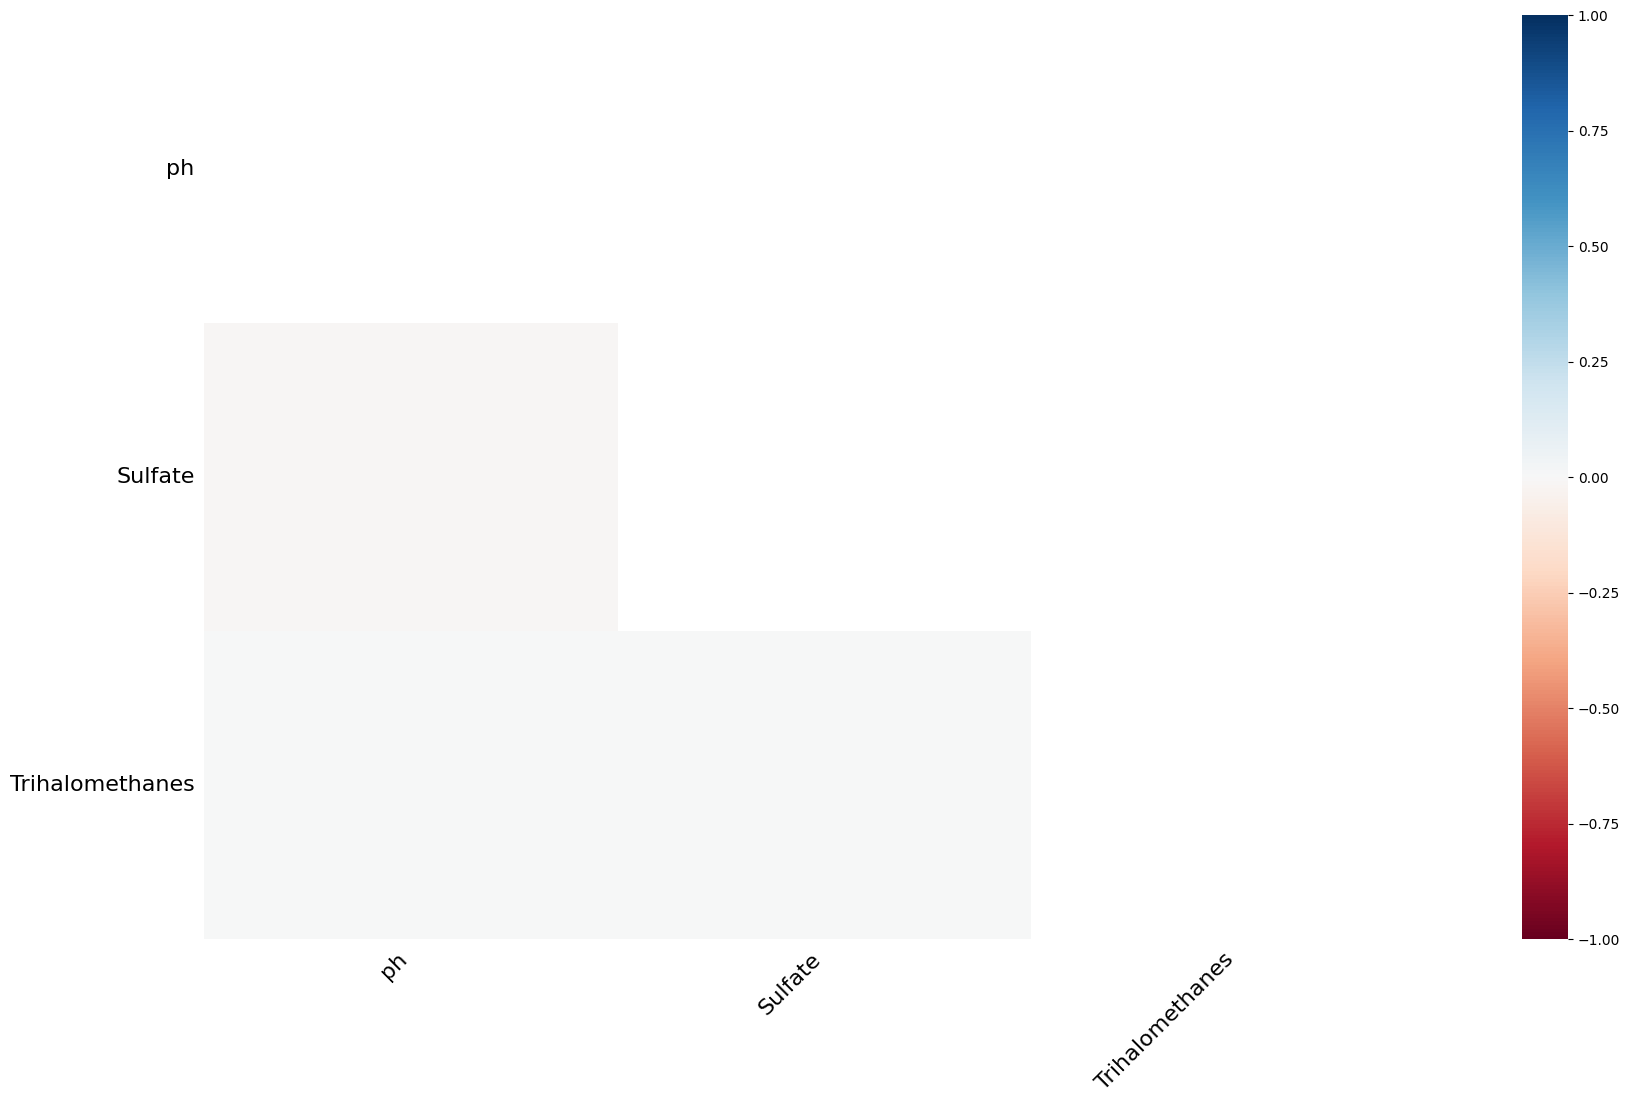

In [ ]:
msno.heatmap(df)

<Axes: >

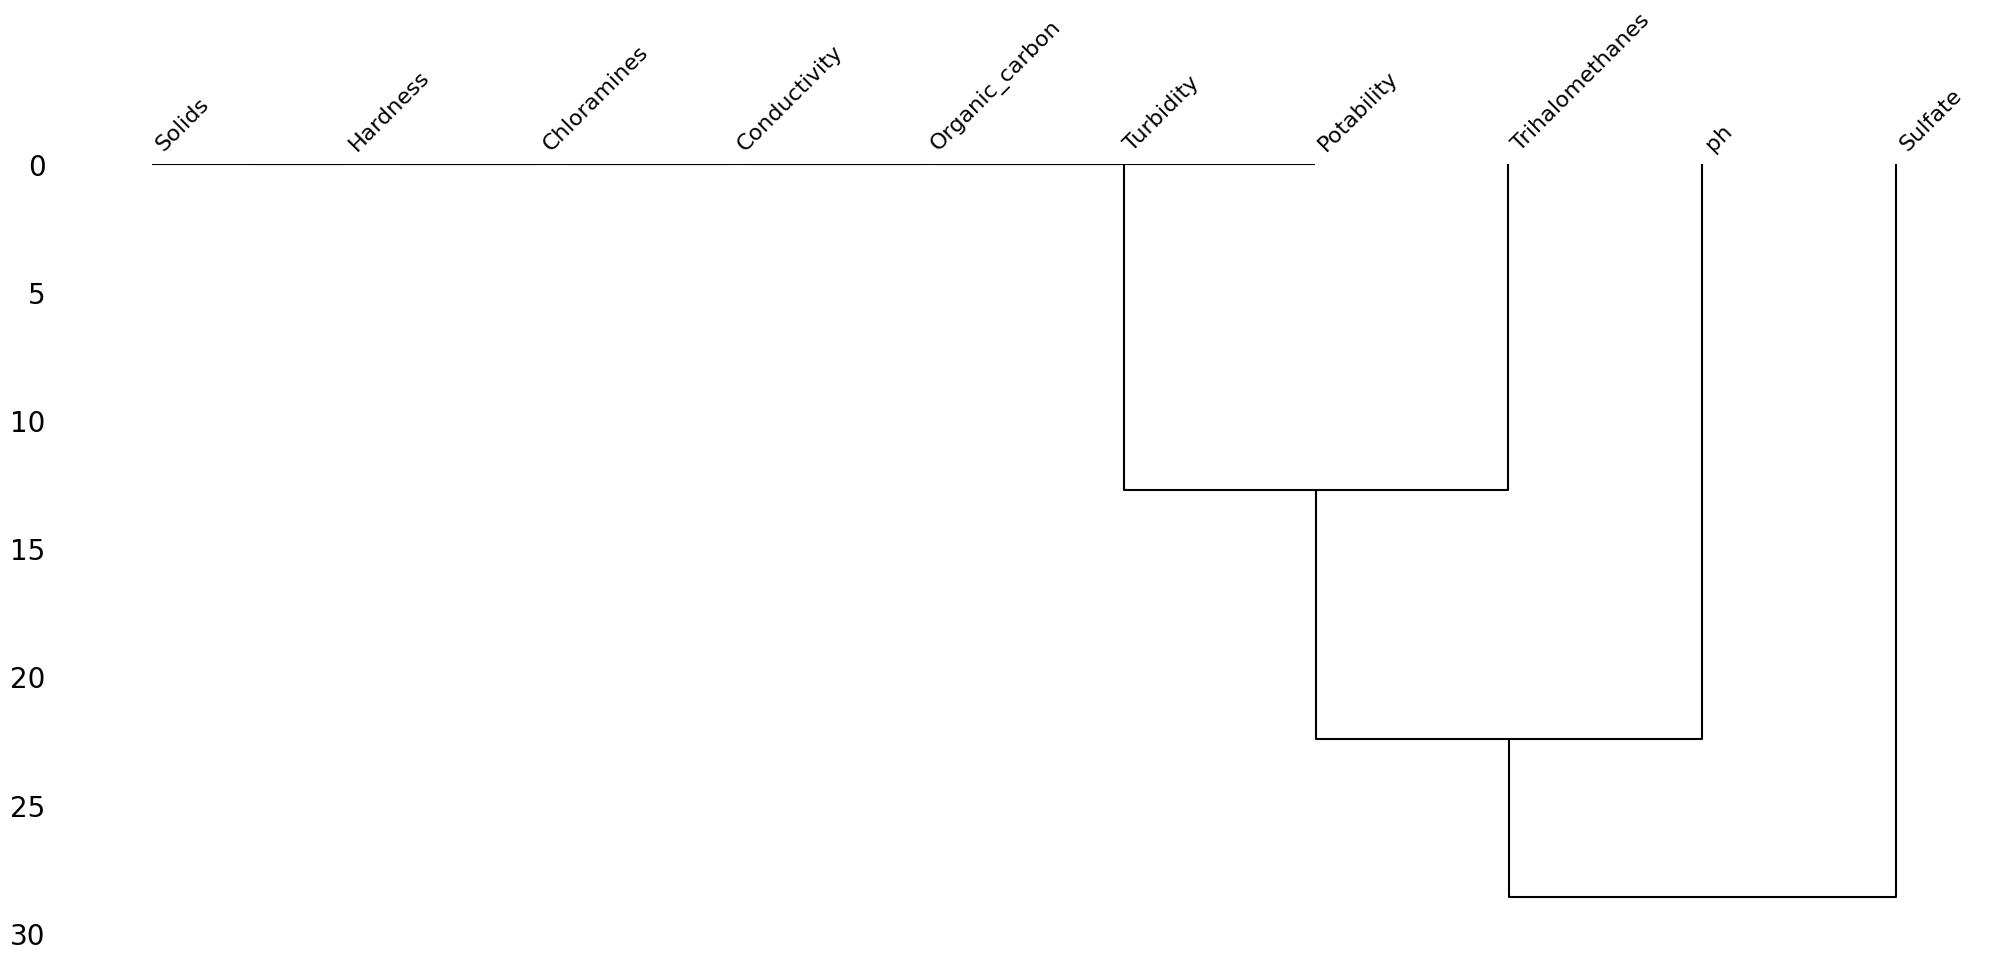

In [ ]:
msno.dendrogram(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.
df_knn = df.copy(deep=True)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

df_knn['ph']=scaler.fit_transform(df_knn['ph'].to_numpy().reshape(-1, 1) )
df_knn['ph'] = knn_imputer.fit_transform(df_knn[['ph']])

df_knn['Sulfate']=scaler.fit_transform(df_knn['Sulfate'].to_numpy().reshape(-1, 1) )
df_knn['Sulfate'] = knn_imputer.fit_transform(df_knn[['Sulfate']])

df_knn['Trihalomethanes']=scaler.fit_transform(df_knn['Trihalomethanes'].to_numpy().reshape(-1, 1) )
df_knn['Trihalomethanes'] = knn_imputer.fit_transform(df_knn[['Trihalomethanes']])

In [ ]:
print(df_knn['ph'].isnull().sum())
print(df_knn['Sulfate'].isnull().sum())
print(df_knn['Trihalomethanes'].isnull().sum())

0
0
0


In [ ]:
df_knn

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Close
0,0.505771,204.890455,20791.318981,7.300212,0.680385,564.308654,10.379783,0.699753,2.963135,0,7.080795
1,0.265434,129.422921,18630.057858,6.635246,0.581699,592.885359,15.180013,0.450999,4.500656,0,3.716080
2,0.578509,224.236259,19909.541732,9.275884,0.581699,418.606213,16.868637,0.532866,3.055934,0,8.099124
3,0.594055,214.373394,22018.417441,8.059332,0.647347,363.266516,18.436524,0.808065,4.628771,0,8.316766
4,0.649445,181.101509,17978.986339,6.546600,0.514545,398.410813,11.558279,0.253606,4.075075,0,9.092223
...,...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,193.681735,47580.991603,7.166639,0.656047,526.424171,13.894419,0.535037,4.435821,1,4.668102
3272,0.557775,193.553212,17329.802160,8.061362,0.581699,392.449580,19.903225,0.532673,2.798243,1,7.808856
3273,0.672822,175.762646,33155.578218,7.350233,0.581699,432.044783,11.039070,0.560655,3.298875,1,9.419510
3274,0.366197,230.603758,11983.869376,6.303357,0.581699,402.883113,11.168946,0.622659,4.708658,1,5.126763


<Axes: >

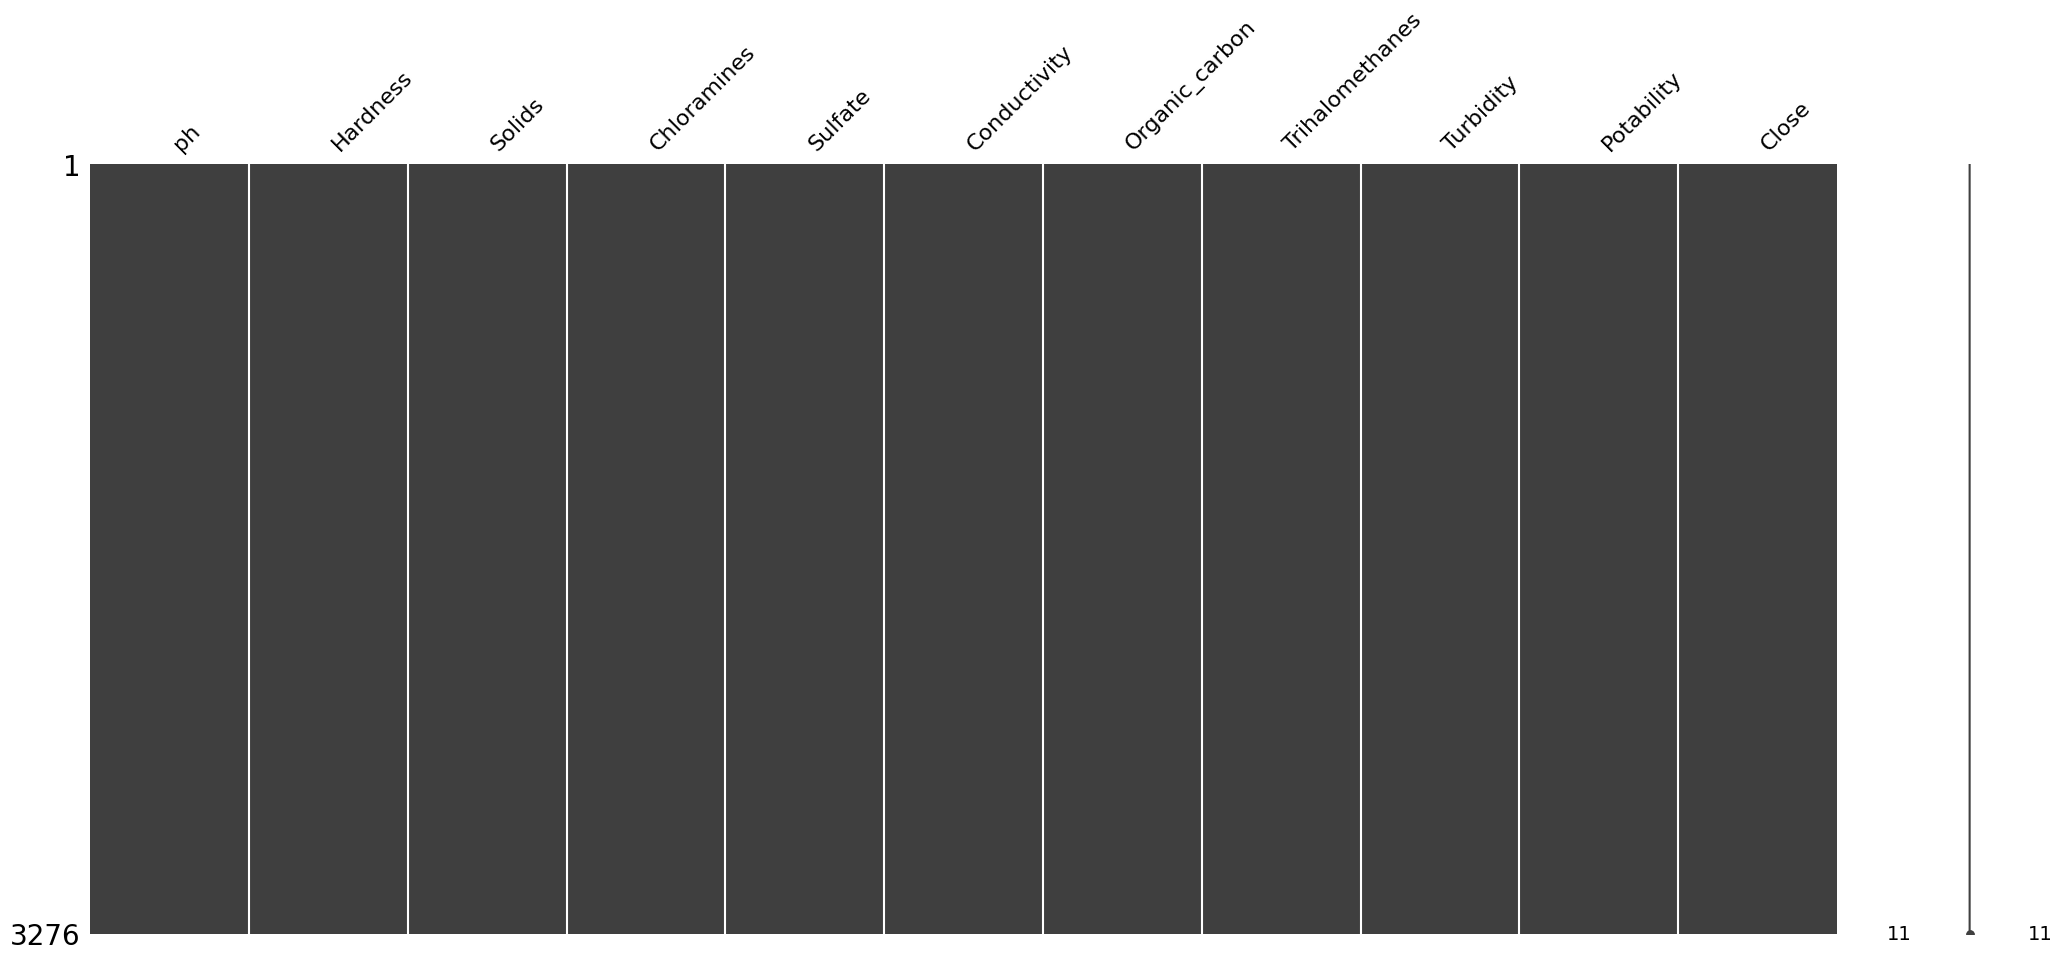

In [ ]:
msno.matrix(df_knn)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [ ]:
X = df_knn.drop('Potability', axis=1)
y = df_knn['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Close
233,0.473115,203.030141,17167.301297,6.049601,0.519064,410.243247,15.914500,0.521517,2.915166,6.623614
831,0.477479,193.840931,34157.184474,9.876574,0.612263,498.063996,8.818757,0.534807,4.030660,6.684700
2658,0.488290,205.667718,18321.327502,6.712854,0.479609,494.484249,13.808923,0.567703,4.952508,6.836060
2495,0.505771,183.488839,12675.938962,9.777807,0.542199,482.445026,13.309723,0.374125,3.240419,7.080795
2603,0.457628,182.885137,17851.064021,7.462758,0.578037,398.779746,17.301617,0.513802,4.573968,6.406798
...,...,...,...,...,...,...,...,...,...,...
1095,0.299106,208.374188,21809.709834,5.846112,0.563798,264.508083,11.235144,0.372739,4.592959,4.187491
1130,0.556708,164.958947,25506.912237,7.868036,0.651248,398.460312,15.297496,0.532673,4.220028,7.793915
1294,0.473597,186.761088,30939.023214,7.703481,0.581699,330.876083,13.815757,0.697823,3.490588,6.630364
860,0.627369,218.032840,16183.586649,7.390474,0.582489,389.021616,16.354520,0.376134,4.274137,8.783168


In [ ]:
y_train

233     0
831     0
2658    0
2495    0
2603    0
       ..
1095    1
1130    1
1294    0
860     0
3174    1
Name: Potability, Length: 2620, dtype: int64

## Feature Scaling
Standardize the features using `StandardScaler`.

In [ ]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()

In [ ]:
dff_knn = scaler.fit_transform(df_knn)

## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Use the trained model to make predictions for the test set.

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

In [ ]:
f1_score(y_test,y_pred,average='micro')

0.5304878048780488

In [ ]:
f1_score(y_test,y_pred,average='macro')

0.48446621759542763

In [ ]:
accuracy_score(y_test, y_pred)

0.5304878048780488

In [ ]:
confusion_matrix(y_test,y_pred)

array([[272, 140],
       [168,  76]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       412
           1       0.35      0.31      0.33       244

    accuracy                           0.53       656
   macro avg       0.49      0.49      0.48       656
weighted avg       0.52      0.53      0.52       656



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a cross-validation with grid search. This involves systematically experimenting with various values for `n_neighbors` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.
df_knn

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Close
0,0.505771,204.890455,20791.318981,7.300212,0.680385,564.308654,10.379783,0.699753,2.963135,0,7.080795
1,0.265434,129.422921,18630.057858,6.635246,0.581699,592.885359,15.180013,0.450999,4.500656,0,3.716080
2,0.578509,224.236259,19909.541732,9.275884,0.581699,418.606213,16.868637,0.532866,3.055934,0,8.099124
3,0.594055,214.373394,22018.417441,8.059332,0.647347,363.266516,18.436524,0.808065,4.628771,0,8.316766
4,0.649445,181.101509,17978.986339,6.546600,0.514545,398.410813,11.558279,0.253606,4.075075,0,9.092223
...,...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,193.681735,47580.991603,7.166639,0.656047,526.424171,13.894419,0.535037,4.435821,1,4.668102
3272,0.557775,193.553212,17329.802160,8.061362,0.581699,392.449580,19.903225,0.532673,2.798243,1,7.808856
3273,0.672822,175.762646,33155.578218,7.350233,0.581699,432.044783,11.039070,0.560655,3.298875,1,9.419510
3274,0.366197,230.603758,11983.869376,6.303357,0.581699,402.883113,11.168946,0.622659,4.708658,1,5.126763


In [ ]:
X = df_knn.drop('Potability', axis=1)
y = df_knn['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Feature Scaling
Standardize the features using `StandardScaler`.

In [ ]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()

In [ ]:
dff_knn = scaler.fit_transform(df_knn)

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.
y_pred2 = knn2.predict(X_test)
y_pred6 = knn2.predict(X_test)
y_pred10 = knn2.predict(X_test)

In [ ]:
f1_score(y_test,y_pred2,average='micro')
f1_score(y_test,y_pred2,average='macro')
accuracy_score(y_test, y_pred2)
confusion_matrix(y_test,y_pred2)

f1_score(y_test,y_pred6,average='micro')
f1_score(y_test,y_pred6,average='macro')
accuracy_score(y_test, y_pred6)
confusion_matrix(y_test,y_pred6)

f1_score(y_test,y_pred10,average='micro')
f1_score(y_test,y_pred10,average='macro')
accuracy_score(y_test, y_pred10)
confusion_matrix(y_test,y_pred10)

array([[170,  34],
       [ 99,  25]])

In [ ]:
print(classification_report(y_test,y_pred2))
print(classification_report(y_test,y_pred6))
print(classification_report(y_test,y_pred10))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       204
           1       0.42      0.20      0.27       124

    accuracy                           0.59       328
   macro avg       0.53      0.52      0.50       328
weighted avg       0.55      0.59      0.55       328

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       204
           1       0.42      0.20      0.27       124

    accuracy                           0.59       328
   macro avg       0.53      0.52      0.50       328
weighted avg       0.55      0.59      0.55       328

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       204
           1       0.42      0.20      0.27       124

    accuracy                           0.59       328
   macro avg       0.53      0.52      0.50       328
weighted avg       0.55      0.59      0.55       328

